In [ ]:
!unzip /content/drive/MyDrive/'Colab Notebooks'/shoe-vs-sandal-vs-boot-dataset-15k-images.zip -d /content

Streaming output truncated to the last 5000 lines.
  inflating: /content/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1).jpg  
  inflating: /content/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (10).jpg  
  inflating: /content/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (100).jpg  
  inflating: /content/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1000).jpg  
  inflating: /content/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1001).jpg  
  inflating: /content/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1002).jpg  
  inflating: /content/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1003).jpg  
  inflating: /content/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1004).jpg  
  inflating: /content/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1005).jpg  
  inflating: /content/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1006).jpg  
  inflating: /content/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1007).jpg  
  inflating: /content/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1008).jpg  
  inflating: /content/Shoe vs Sandal vs Boo

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from skimage.feature import local_binary_pattern
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

import os

shoe_dir = '/content/Shoe vs Sandal vs Boot Dataset/Shoe'
sandal_dir = '/content/Shoe vs Sandal vs Boot Dataset/Sandal'
boot_dir = '/content/Shoe vs Sandal vs Boot Dataset/Boot'


# Load ResNet50 model
resnet_model = ResNet50(include_top=False, weights='imagenet', pooling='avg')


# Define function to extract ResNet50 features for an image
def extract_resnet_features(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = preprocess_input(img)
    features = resnet_model.predict(np.expand_dims(img, axis=0))[0]
    return features


# Define function to extract LBP features for an image
def extract_lbp_features(img_path):
    img = cv2.imread(img_path, 0)
    lbp = local_binary_pattern(img, 8, 1)
    (hist, _) = np.histogram(lbp.ravel(),
                              bins=np.arange(0, 10),
                              range=(0, 10))
    # normalize the histogram
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-7)
    return hist


# Define function to extract all features for an image
def extract_features(img_path):
    resnet_features = extract_resnet_features(img_path)
    lbp_features = extract_lbp_features(img_path)
    img = cv2.imread(img_path)
    img_height, img_width, _ = img.shape
    features = np.concatenate([resnet_features, [img_height, img_width], lbp_features])
    return features


# Create a CSV file of all features
df = pd.DataFrame(columns=["f"+str(i) for i in range(2048)] + ["height", "width"] + ["lbp"+str(i) for i in range(10)])
len(df.columns)


# Create a list of image paths (limited to first 3500 images from each directory)
image_paths = []
for cls_dir, cls_label in zip([shoe_dir, sandal_dir, boot_dir], [0, 1, 2]):
    count = 0
    for img_file in os.listdir(cls_dir):
        # if count > 5 :
        #     break
        if img_file.endswith('.jpg') or img_file.endswith('.jpeg'):
            img_path = os.path.join(cls_dir, img_file)
            image_paths.append((img_path, cls_label))
            # count += 1


# Extract features for all images and add them to the DataFrame
for img_path, cls_label in image_paths:
    features = extract_features(img_path)
    features = np.concatenate([features, [cls_label]])
    df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
 
# Add a column for the class labels (0 = Shoe, 1 = Sandal, 2 = Boot)
# df['class'] = [0]*3 + [1]*3 + [2]*3

df['class'] = [0]*len(os.listdir(shoe_dir)) + [1]*len(os.listdir(sandal_dir)) + [2]*len(os.listdir(boot_dir))
df.to_csv('image_features22.csv', index=False)

images done =  0
images done =  100
images done =  200
images done =  300
images done =  400
images done =  500
images done =  600
images done =  700
images done =  800
images done =  900
images done =  1000
images done =  1100
images done =  1200
images done =  1300
images done =  1400
images done =  1500
images done =  1600
images done =  1700
images done =  1800
images done =  1900
images done =  2000
images done =  2100
images done =  2200
images done =  2300
images done =  2400
images done =  2500
images done =  2600
images done =  2700
images done =  2800
images done =  2900
images done =  3000
images done =  3100
images done =  3200
images done =  3300
images done =  3400
images done =  3500
images done =  3600
images done =  3700
images done =  3800
images done =  3900
images done =  4000
images done =  4100
images done =  4200
images done =  4300
images done =  4400
images done =  4500
images done =  4600
images done =  4700
images done =  4800
images done =  4900
images done 

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 25ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 64ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 64ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 25ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 98ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 70ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 61ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 106ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 83ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 25ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 25ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 25ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 61ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 66ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 88ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 70ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 69ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 73ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 25ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 25ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 64ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 72ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 69ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 85ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 63ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 69ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 79ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 68ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 73ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 67ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 63ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 83ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 92ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 66ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 84ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 86ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 65ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 83ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 96ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 72ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 90ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 72ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 69ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 63ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 79ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 79ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 77ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 86ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 65ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 83ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 93ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 92ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 63ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 67ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 74ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 63ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 84ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 64ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 81ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 66ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 77ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 74ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 78ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 71ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 69ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 78ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 80ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 70ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 74ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 67ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 80ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 77ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 65ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 64ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 67ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 78ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 90ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 91ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 75ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 82ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 76ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 80ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 70ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 70ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 74ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 78ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 80ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 85ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 81ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 67ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 77ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 64ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 75ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 83ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 69ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 76ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 78ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 72ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 63ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 72ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 104ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 103ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 67ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 64ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 67ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 87ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 93ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 63ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 68ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 89ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 87ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 79ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 77ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 79ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 82ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 64ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 65ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 64ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 67ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 84ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 61ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 77ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 77ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 69ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 77ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 66ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 69ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 66ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 74ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 90ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 83ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 68ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 78ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 61ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 64ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 86ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 68ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 91ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 64ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 64ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 65ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 73ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 66ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 88ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 78ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 78ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 74ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 71ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 63ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 74ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 65ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 90ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 67ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 63ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 61ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 64ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 78ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 86ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 66ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 61ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 106ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 63ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 63ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 70ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 63ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 83ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 71ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 96ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 68ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 88ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 91ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 85ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 73ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 61ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 93ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 71ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 75ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 76ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 74ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 64ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 77ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 80ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 67ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 75ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 76ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 66ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 64ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 65ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 74ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 86ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 67ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 82ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 61ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 86ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 68ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 68ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 64ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 74ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 70ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 76ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 84ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 78ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 82ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 85ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 72ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 72ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 68ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 61ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 67ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 86ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 76ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 91ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 92ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 75ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 80ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 64ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 68ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 68ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 65ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 65ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 61ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 65ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 66ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 67ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 71ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 64ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 66ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 74ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 84ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 66ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 80ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 79ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 91ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 71ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 66ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 71ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 80ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 117ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 89ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 61ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 82ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 69ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 72ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 89ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 101ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 68ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 79ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 70ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 63ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 89ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 89ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 61ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 75ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 68ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 63ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 65ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 91ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 76ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 80ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 87ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 87ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 63ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 67ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 76ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 66ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 79ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 83ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 82ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 84ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 68ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 67ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 66ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 92ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 75ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 67ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 85ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 91ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 61ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 69ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 67ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 86ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 70ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 95ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 79ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 75ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 75ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 61ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 78ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 78ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 63ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 66ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 75ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 80ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 64ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 68ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 75ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 61ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 78ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 64ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 86ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 70ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 74ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 94ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 82ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 90ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 101ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 66ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 64ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 84ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 65ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 81ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 73ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 75ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 76ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 83ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 63ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 67ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 65ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 68ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 75ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 71ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 80ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 86ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 63ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 65ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 66ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 64ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 63ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 65ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 85ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 68ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 79ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 87ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 85ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 78ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 70ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 83ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 73ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 63ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 61ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 65ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 69ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 87ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 91ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 70ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 72ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 66ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 63ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 69ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 90ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 63ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 89ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 97ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 64ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 69ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 61ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 86ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 84ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 67ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 97ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 66ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 69ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 83ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 82ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 68ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 69ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 78ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 65ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 64ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 68ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 99ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 105ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 69ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 97ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 74ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 79ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 85ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 90ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 96ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 83ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 70ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 86ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 63ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 76ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 72ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 75ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 64ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 72ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 77ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 69ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 92ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 65ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 84ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 61ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 63ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 67ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 92ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 74ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 73ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 98ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 64ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 70ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 82ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 67ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 71ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 65ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 64ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 63ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 63ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 75ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 83ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 82ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 83ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 88ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 72ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 87ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 66ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 91ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 88ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 61ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 72ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 70ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 71ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 65ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 69ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 87ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 87ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 79ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 84ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 89ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 66ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 61ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 61ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 71ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 80ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 85ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 63ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 66ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 89ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 69ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 64ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 64ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 97ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 93ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 74ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 69ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 91ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 75ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 84ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 81ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 91ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 66ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 74ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 74ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 64ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 86ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 70ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 66ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 73ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 68ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 65ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 61ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 69ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 66ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 88ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 75ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 77ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 88ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 64ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 61ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 65ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 79ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 86ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 90ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 107ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 68ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 79ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 66ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 61ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 63ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 65ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 70ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 61ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 79ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 79ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 89ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 81ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 76ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 73ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 61ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 89ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 64ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 94ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 66ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 65ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 61ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 86ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 79ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 86ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 64ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 61ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 64ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 64ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 87ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 93ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 94ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 88ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 88ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 73ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 73ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 86ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 70ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 67ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 63ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 64ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 89ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 74ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 74ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 67ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 69ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 85ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 77ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 64ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 86ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 86ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 73ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 61ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 82ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 89ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 74ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 66ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 107ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 64ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 89ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 80ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 102ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 86ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 61ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 65ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 85ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 90ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 94ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 90ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 67ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 63ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 66ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 76ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 79ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 80ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 68ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 61ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 64ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 90ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 86ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 85ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 61ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 69ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 72ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 68ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 79ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 69ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 91ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 65ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 64ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 67ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 79ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 63ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 82ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 65ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 61ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 83ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 93ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 85ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 83ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 71ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 81ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 90ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 69ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 84ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 65ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 92ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 69ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 75ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 81ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 91ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 84ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 73ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 76ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 61ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 74ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 91ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 61ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 74ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 61ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 64ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 70ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 66ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 84ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 68ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 95ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 69ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 70ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 92ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 77ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 71ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 94ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 74ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 73ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 89ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 68ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 105ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 66ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 90ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 63ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 72ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 67ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 85ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 88ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 70ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 66ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 69ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 76ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 82ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 83ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 79ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 81ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 61ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 61ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 61ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 68ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 83ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 73ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 79ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 73ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 74ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 76ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 69ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 66ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 70ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 70ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 78ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 85ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 95ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 93ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 88ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 65ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 78ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 74ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 88ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 78ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 65ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 80ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 65ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 101ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 84ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 85ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 83ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 79ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 65ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 63ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 67ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 80ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 79ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 83ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 61ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 75ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 89ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 94ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 68ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 78ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 78ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 81ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 81ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 75ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 71ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 83ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 61ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 67ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 74ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 80ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 75ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 89ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 73ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 72ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 78ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 94ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 96ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 88ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 78ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 61ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 66ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 66ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 71ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 75ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 83ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 77ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 88ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 63ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 79ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 73ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 83ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 76ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 73ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 85ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 95ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 61ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 61ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 76ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 68ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 79ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 83ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 77ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 95ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 84ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 67ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 83ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 61ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 81ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 71ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 68ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 68ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 61ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 66ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 77ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 102ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 84ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 99ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 65ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 102ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 101ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 76ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 101ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 74ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 90ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 92ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 69ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 70ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 77ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 75ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 82ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 80ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 77ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 68ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 82ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 69ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 88ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 68ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 84ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 68ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 90ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 93ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 79ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 75ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 71ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 86ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 86ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 86ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 80ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 66ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 74ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 83ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 86ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 76ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 83ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 64ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 84ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 64ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 68ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 70ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 68ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 61ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 64ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 76ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 84ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 72ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 90ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 75ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 71ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 70ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 74ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 88ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 81ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 65ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 74ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 89ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 71ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 73ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 74ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 83ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 68ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 86ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 81ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 78ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 64ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 86ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 72ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 83ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 87ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 70ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 76ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 83ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 64ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 80ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 82ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 68ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 78ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 68ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 86ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 72ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 83ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 81ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 65ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 84ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 78ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 85ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 65ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 80ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 81ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 69ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 94ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 78ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 68ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 86ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 65ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 77ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 72ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 71ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 61ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 75ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 64ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 85ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 94ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 74ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 101ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 66ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 65ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 106ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 70ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 66ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 63ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 61ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 65ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 86ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 77ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 84ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 69ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 63ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 87ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 75ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 72ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 78ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 71ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 96ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 87ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 83ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 65ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 61ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 77ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 65ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 78ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 94ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 66ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 83ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 81ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 70ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 83ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 78ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 78ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 80ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 91ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 80ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 67ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 68ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 65ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 71ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 90ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 88ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 77ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 75ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 74ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 76ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 85ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 83ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 75ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 87ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 81ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 83ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 82ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 71ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 65ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 79ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 79ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 88ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 76ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 84ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 78ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 84ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 68ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 72ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 84ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 70ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 67ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 91ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 74ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 76ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 66ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 71ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 80ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 87ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 81ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 71ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 80ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 65ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 84ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 86ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 63ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 67ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 89ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 87ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 66ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 74ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 61ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 61ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 67ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 70ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 91ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 63ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 67ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 61ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 70ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 66ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 67ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 88ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 71ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 66ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 74ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 82ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 79ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 110ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 76ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 96ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 75ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 67ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 65ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 102ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 61ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 71ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 79ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 66ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 83ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 97ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 71ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 87ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 90ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 85ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 77ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 67ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 85ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 82ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 64ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 66ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 65ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 68ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 85ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 79ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 76ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 77ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 66ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 82ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 82ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 82ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 86ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 78ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 64ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 68ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 73ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 78ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 81ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 90ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 93ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 71ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 87ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 65ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 83ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 77ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 65ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 69ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 90ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 66ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 61ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 84ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 65ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 65ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 83ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 82ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 84ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 81ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 70ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 86ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 80ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 81ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 90ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 68ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 61ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 67ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 92ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 78ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 95ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 94ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 75ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 83ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 79ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 91ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 61ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 85ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 76ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 80ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 63ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 93ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 63ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 76ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 83ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 84ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 81ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 78ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 78ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 65ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 78ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 94ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 81ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 63ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 76ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 64ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 74ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 64ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 85ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 83ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 94ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 76ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 67ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 70ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 68ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 84ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 63ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 102ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 103ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 98ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 101ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 100ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 105ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 77ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 99ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 75ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 103ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 68ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 71ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 96ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 65ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 103ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 66ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 88ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 86ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 86ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 73ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 68ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 72ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 82ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 90ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 78ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 66ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 68ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 87ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 80ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 77ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 95ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 95ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 64ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 87ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 89ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 68ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 84ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 91ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 67ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 73ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 71ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 75ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 88ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 88ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 70ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 94ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 81ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 82ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 67ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 70ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 88ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 86ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 73ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 71ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 70ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 65ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 66ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 68ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 77ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 66ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 87ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 92ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 75ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 81ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 90ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 79ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 77ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)
<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-12-81092f7a2290>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(features, index=df.columns), ignore_index=True)


In [ ]:
# df.to_csv('image_features1.csv', index=False)
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/image_features22.csv")
df

f0        f1        f2        f3        f4        f5        f6  \
0      0.013780  0.012253  0.520837  0.000000  0.534770  0.021656  0.110598   
1      0.000000  0.386253  0.241233  0.002457  0.153668  1.475750  0.216315   
2      0.000000  0.715241  0.007206  0.291096  0.489226  0.051337  0.523952   
3      0.117374  0.134346  0.087573  0.023511  0.440383  1.569339  1.269817   
4      0.000000  0.439764  0.067845  0.002178  0.042926  2.597545  0.216961   
...         ...       ...       ...       ...       ...       ...       ...   
14995  0.006041  0.207161  0.322612  0.063130  1.143153  0.054748  0.019474   
14996  0.000000  0.760004  0.050211  0.076093  0.096732  0.278582  0.881895   
14997  0.000000  0.564078  0.022903  0.020383  0.160483  1.018543  0.853500   
14998  0.000000  0.786143  0.108305  0.000000  1.980890  1.143692  0.928170   
14999  0.000000  1.650126  0.564039  0.000000  0.477716  0.009852  0.517196   

             f7        f8        f9  ...      lbp1      lbp2      lbp3  \
0      1.042210  0.060440  0.000000  ...  0.221053  0.013158  0.026316   
1      0.257840  0.000000  0.001962  ...  0.236205  0.018393  0.021297   
2      1.056575  0.035889  0.000000  ...  0.247532  0.011390  0.028094   
3      2.498620  0.047389  0.018661  ...  0.215054  0.009558  0.013142   
4      0.134675  0.009510  0.000000  ...  0.228950  0.020814  0.024598   
...         ...       ...       ...  ...       ...       ...       ...   
14995  0.217072  0.117206  0.000000  ...  0.240945  0.007874  0.045669   
14996  0.197527  0.122371  0.075360  ...  0.205543  0.016166  0.050808   
14997  1.084693  0.000000  0.004192  ...  0.210526  0.017186  0.026853   
14998  0.643405  0.400204  0.057274  ...  0.179487  0.013495  0.026991   
14999  0.799719  0.225506  0.015697  ...  0.185484  0.017742  0.050000   

           lbp4      lbp5      lbp6      lbp7      lbp8  lbp9  class  
0      0.085526  0.027632  0.030263  0.110526  0.030263   0.0      0  
1      0.100678  0.038722  0.020329  0.115198  0.023233   0.0      0  
2      0.097950  0.037206  0.031131  0.117692  0.026576   0.0      0  
3      0.136201  0.054958  0.027479  0.155317  0.025090   0.0      0  
4      0.120151  0.034059  0.023652  0.108798  0.025544   0.0      0  
...         ...       ...       ...       ...       ...   ...    ...  
14995  0.107087  0.044094  0.025197  0.185827  0.009449   2.0      2  
14996  0.116628  0.031178  0.048499  0.162818  0.017321   2.0      2  
14997  0.121375  0.042965  0.032223  0.126745  0.024705   2.0      2  
14998  0.203779  0.024291  0.059379  0.172740  0.016194   2.0      2  
14999  0.169355  0.037097  0.041935  0.156452  0.022581   2.0      2  

[15000 rows x 2061 columns]

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from skimage.feature import local_binary_pattern

In [ ]:
# Split the DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df['class'], test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Train an SVM model on the training set
svm_model = SVC(kernel='rbf', C=10, gamma='auto')
svm_model.fit(X_train, y_train)

# Evaluate the model on the testing set
accuracy = svm_model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.99


In [ ]:
# print(X_test_scaled)
pred_y= svm_model.predict(X_test)

In [ ]:
pred_y

array([2, 1, 2, ..., 2, 2, 2])

In [ ]:
df['class'].unique()

array([0, 1, 2])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy, precision, recall and F1 score
accuracy = accuracy_score(y_test, pred_y)
precision = precision_score(y_test, pred_y, average='weighted')
recall = recall_score(y_test, pred_y, average='weighted')
f1 = f1_score(y_test, pred_y, average='weighted')

# Print the scores
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 score: {:.2f}".format(f1))

Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1 score: 0.99


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred_y)

array([[1024,    8,    5],
       [   9,  960,    1],
       [   4,    3,  986]])

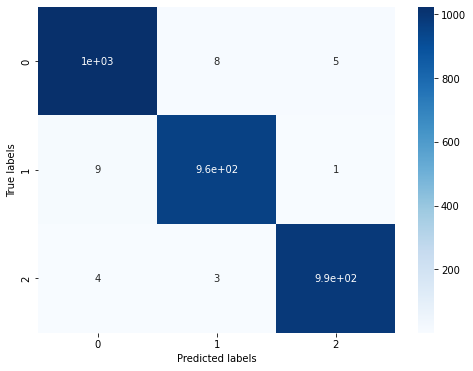

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(y_test, pred_y)

# Create a heatmap visualization of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [ ]:
from joblib import dump, load

# Save the model
dump(svm_model, 'svm_model.joblib')

# Load the model
svm_model = load('svm_model.joblib')


In [ ]:
import cv2
import numpy as np
from PIL import Image
from joblib import load
from skimage.feature import local_binary_pattern
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input


# Constants
IMG_SIZE = (224, 224)
LBP_RADIUS = 1
LBP_POINTS = 8
LBP_HIST_BINS = 10
FEATURES_SIZE = 2060


# Load pre-trained SVM model
svm_model = load('svm_model.joblib')

# Define class labels
CLASS_LABELS = {0: 'Shoe', 1: 'Sandal', 2: 'Boot'}


def extract_resnet_features(img):
    """
    Extract features from an image using ResNet50.
    """
    img = cv2.resize(img, IMG_SIZE)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = preprocess_input(img)
    resnet_model = ResNet50(include_top=False, weights='imagenet', pooling='avg')
    features = resnet_model.predict(np.expand_dims(img, axis=0))[0]
    return features


def extract_lbp_features(img):
    """
    Extract Local Binary Pattern (LBP) features from an image.
    """
    lbp = local_binary_pattern(img, LBP_POINTS, LBP_RADIUS)
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, LBP_HIST_BINS), range=(0, LBP_HIST_BINS))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-7)
    return hist


def preprocess_image(img_path):
    """
    Preprocess an image by resizing and converting it to grayscale.
    """
    img = cv2.imread(img_path)
    img = cv2.resize(img, IMG_SIZE)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return gray


def extract_image_features(img_path):
    """
    Extract features from an image and concatenate them.
    """
    img = preprocess_image(img_path)
    resnet_features = extract_resnet_features(img)
    lbp_features = extract_lbp_features(img)
    img_height, img_width = IMG_SIZE
    # missing_feature = np.random.rand()
    # print(missing_feature)
    features = np.concatenate([resnet_features, [img_height, img_width], lbp_features, [94]])
    features = features.reshape(-1, FEATURES_SIZE)
    return features


def predict_class(img_path):
    """
    Predict the class of an image.
    """
    features = extract_image_features(img_path)
    pred = svm_model.predict(features)[0]
    class_label = CLASS_LABELS[pred]
    return class_label


In [ ]:
img_path = "/content/Shoe (1008).jpg"
predicted_value = predict_class(img_path)

1/1 [==============================] - 1s 1s/step


In [ ]:
print(predicted_value)

Sandal
